In [19]:
import pandas as pd

# Load the dataset to see what it contains
data = pd.read_csv("Mall_Customers.csv")

# Display basic info and first 5 rows
data.info(),data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode the Gender column since it's categorical
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [21]:
from sklearn.preprocessing import StandardScaler

# Use sklearn for output in pandas dataframe
from sklearn import set_config
set_config(transform_output='pandas')

# Standardizing the data (excluding CustomerID)
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(["CustomerID"],axis=1))
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [29]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

,pca0,pca1
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


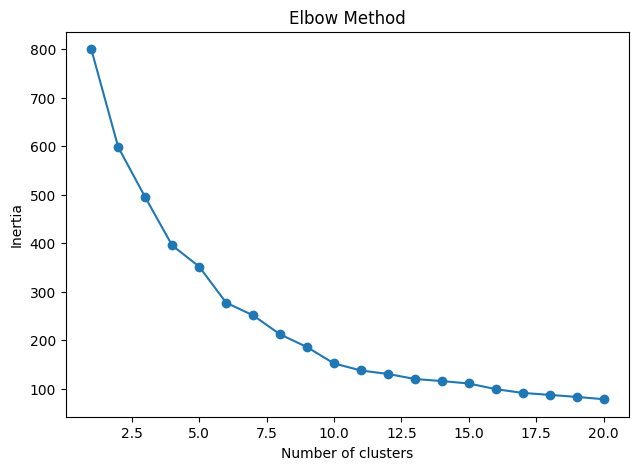

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
for i in range(20):
    km = KMeans(n_clusters = i+1, n_init = "auto", random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

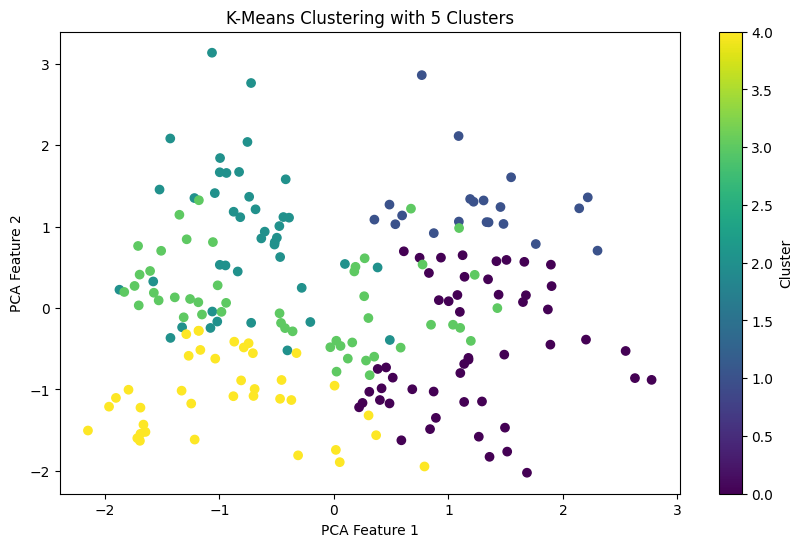

In [33]:
# Applying K-Means with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, n_init = 1, max_iter = 300, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Visualizing the clusters using PCA-reduced features
plt.figure(figsize=(10, 6))
plt.scatter(X_pca['pca0'], X_pca['pca1'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()